In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import cv2

Using TensorFlow backend.


In [37]:
#loading dataset
import glob
x = []
y=[]
size=128,128
for img in glob.glob("../nndl/flowers-recognition/flowers/daisy/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,size)
    x.append(n)
    y.append(0)
for img in glob.glob("../nndl/flowers-recognition/flowers/rose/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,size)
    x.append(n)
    y.append(1)
for img in glob.glob("../nndl/flowers-recognition/flowers/sunflower/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,size)
    x.append(n)
    y.append(2)
#x = [cv2.resize(cv2.imread(file),size) for file in glob.glob('../flowers-recognition/flowers/daisy/*.jpg')]

In [52]:
#preparing dataset
X=np.array(x)
Y=np.array(y)
print(X.shape)
print(Y.shape)
X=X.astype('float32')/255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,shuffle= True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
from keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_test= to_categorical(y_test,3)

(2287, 128, 128, 3)
(2287,)
(1829, 128, 128, 3)
(1829,)
(458, 128, 128, 3)
(458,)


In [46]:
#Building the model
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D,Reshape
from keras.layers import Flatten, Dense,UpSampling2D

model = Sequential()
model.add(Convolution2D(64, (2, 2), input_shape=(128,128,3),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(3,activation="softmax"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 128, 128, 64)      832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 16)        4112      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
__________

In [50]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
bye = model.fit(X_train,y_train, validation_split = 0.2, epochs=10, batch_size=64, verbose=1)

Train on 1463 samples, validate on 366 samples
Epoch 1/10
1463/1463 [==============================] - 114s 78ms/step - loss: 1.6714 - acc: 0.3691 - val_loss: 1.0698 - val_acc: 0.5656
Epoch 2/10
1463/1463 [==============================] - 102s 70ms/step - loss: 0.9153 - acc: 0.5373 - val_loss: 0.8155 - val_acc: 0.6639
Epoch 3/10
1463/1463 [==============================] - 105s 72ms/step - loss: 0.6803 - acc: 0.7184 - val_loss: 0.6643 - val_acc: 0.7240
Epoch 4/10
1463/1463 [==============================] - 103s 70ms/step - loss: 0.5785 - acc: 0.7717 - val_loss: 0.5882 - val_acc: 0.7951
Epoch 5/10
1463/1463 [==============================] - 107s 73ms/step - loss: 0.5002 - acc: 0.8113 - val_loss: 0.5780 - val_acc: 0.7842
Epoch 6/10
1463/1463 [==============================] - 110s 75ms/step - loss: 0.4202 - acc: 0.8360 - val_loss: 0.5188 - val_acc: 0.8087
Epoch 7/10
1463/1463 [==============================] - 128s 87ms/step - loss: 0.3703 - acc: 0.8565 - val_loss: 0.5458 - val_acc: 0

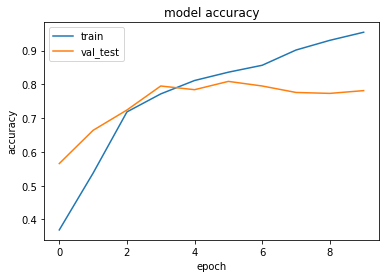

In [56]:
import matplotlib.pyplot as plt
plt.plot(bye.history['acc'])
plt.plot(bye.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper left')
plt.show()


In [67]:
output=model.predict(X_test)

Predicted 0  Actual 1
Predicted 0  Actual 0
Predicted 2  Actual 2
Predicted 1  Actual 1
Predicted 2  Actual 2
Predicted 1  Actual 1
Predicted 1  Actual 2
Predicted 2  Actual 2
Predicted 2  Actual 2


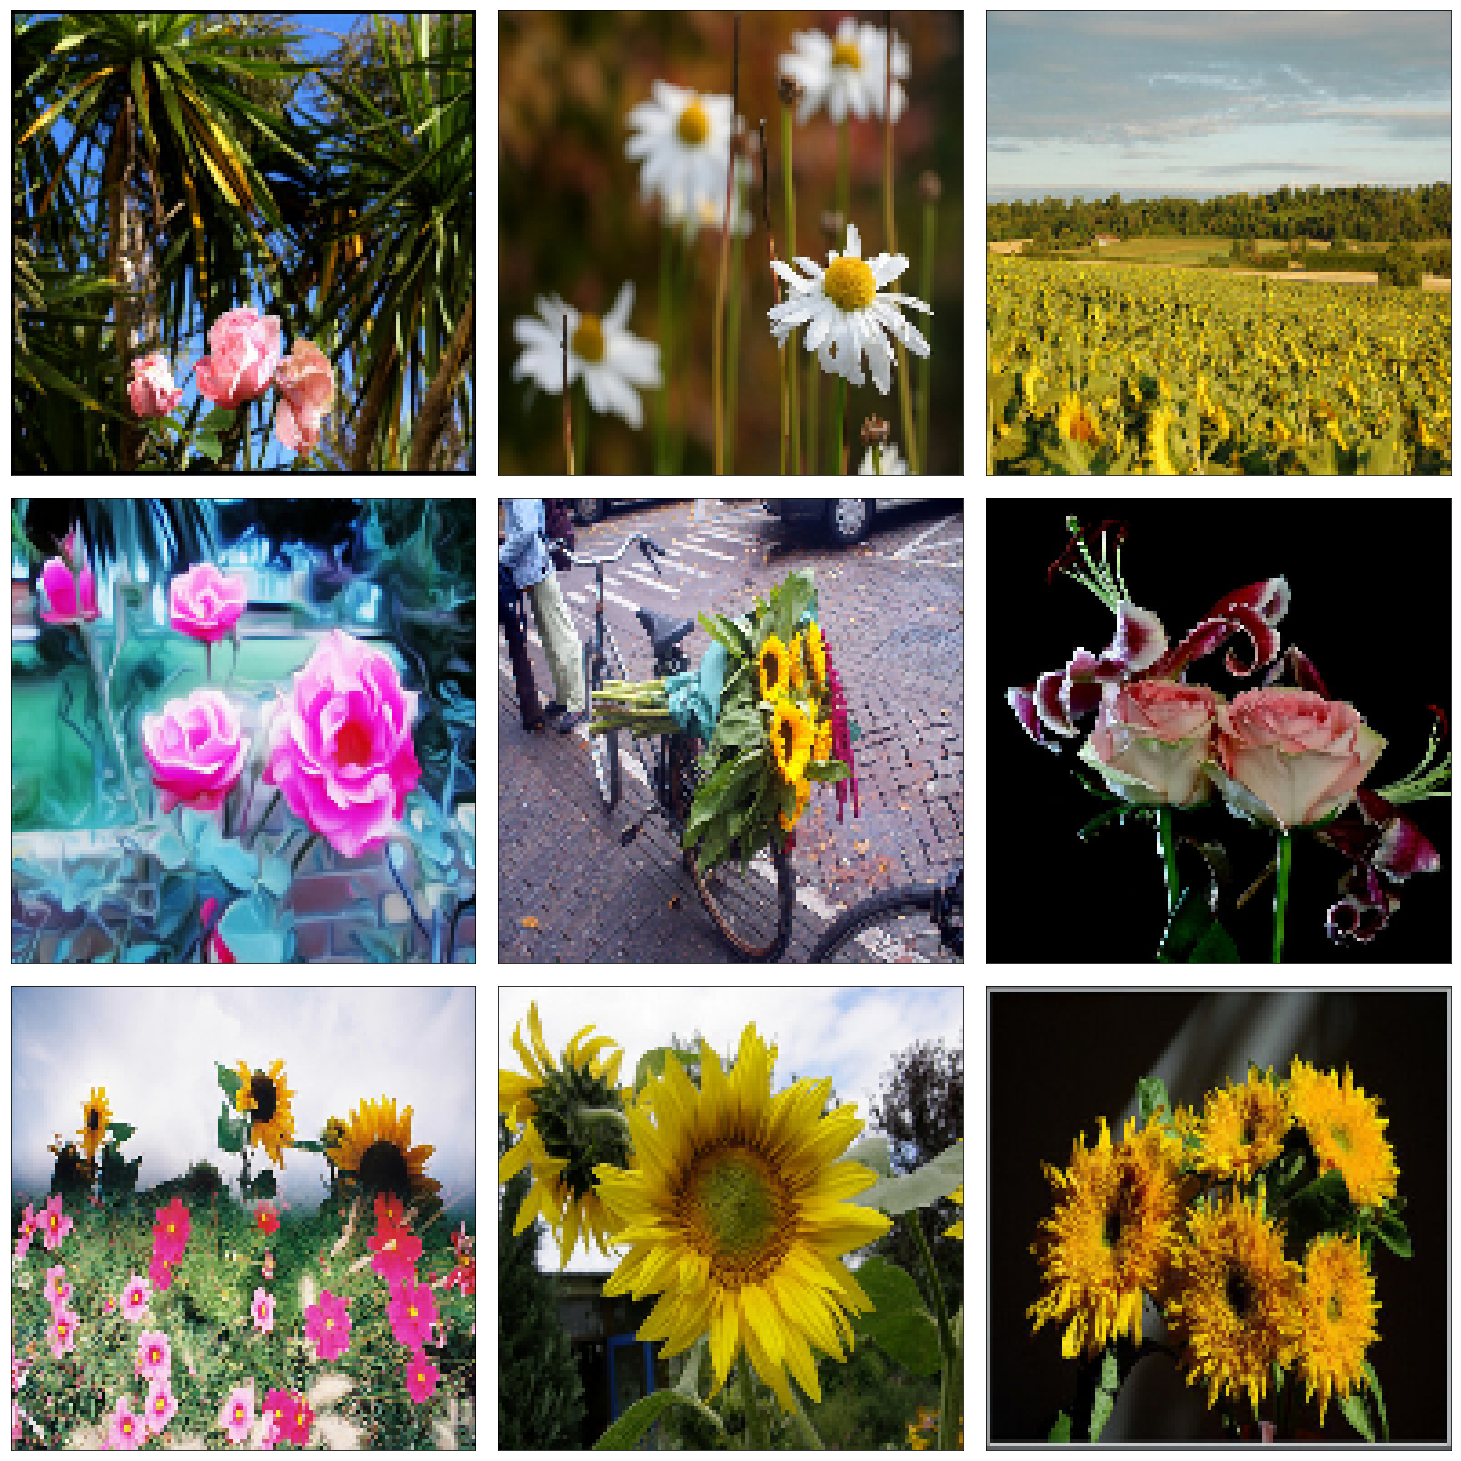

In [72]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(cv2.cvtColor(np.reshape(X_test[i],[128,128,3]), cv2.COLOR_BGR2RGB)) # plot the image
    print("Predicted",np.argmax(output[i])," Actual",np.argmax(y_test[i]))
    
#0 - daisy
#1 - rose
#2 - sunflower

In [90]:
from sklearn.metrics import accuracy_score as acc
y_given,y_pred=[],[]
for i in range(0,len(y_test)):
    y_given.append(np.argmax(y_test[i]))
    y_pred.append(np.argmax(output[i]))
print("Test Accuracy:",acc(y_given,y_pred)*100)

#We can achieve more training accuracy with more epochs. But clearly validation accuracy remains around 80 percent 
#and doesnt go beyond that. So this is more or less the maximum test accuracy which can be achieved given that
#already more than 8 million parameters are used for training.

Test Accuracy: 75.5458515284


In [ ]:
1008566138_6927679c8a.jpg